In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

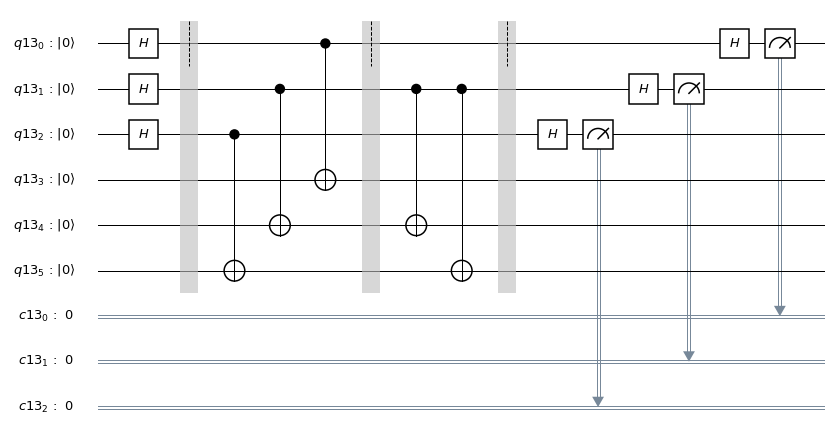

In [92]:
n = 3

qr = QuantumRegister(n*2) # 4 qubit register
cr = ClassicalRegister(n) # 1 classical register
circ = QuantumCircuit(qr, cr) # Quantum Circuit on q

for i in range(0, n):
    circ.h(qr[i])

circ.barrier()

for i in range(0, n):
    circ.cx(qr[i], qr[n+i])
circ.barrier()
secret = ""
for i in range(0, n):
    secret += str(random.randint(0, 10000)%2)

s = "011" #temp val

#xor s to register 2 (temp).
for i, c in enumerate(s):
    if c == '1':
        circ.cx(qr[1], qr[n+i])

# TO DO, rest of black box. maybe

circ.barrier()

for i in range(0, n):
    circ.h(qr[i])

for i in range(n):
    circ.measure(qr[i], cr[i])

circ.draw(output='mpl')

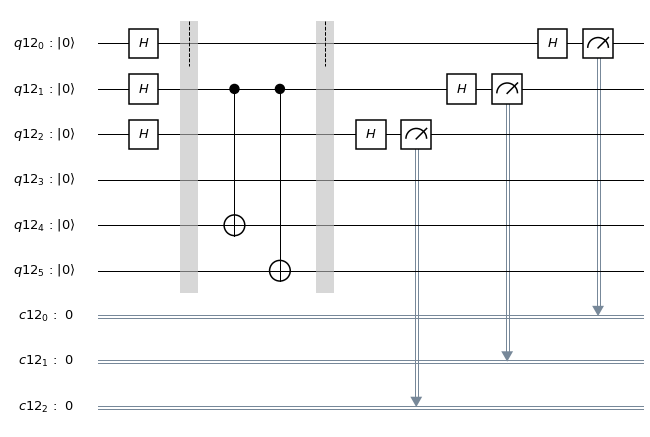

In [61]:
n = 3

qr = QuantumRegister(n*2) # 4 qubit register
cr = ClassicalRegister(n) # 1 classical register
circ = QuantumCircuit(qr, cr) # Quantum Circuit on q

for i in range(0, n):
    circ.h(qr[i])

circ.barrier()

secret = ""
for i in range(0, n):
    secret += str(random.randint(0, 10000)%2)

s = "010" #temp val

#xor s to register 2 (temp).
for i, c in enumerate(s):
    if c == '1':
        circ.cx(qr[1], qr[n+i])

# TO DO, rest of black box. maybe

circ.barrier()

for i in range(0, n):
    circ.h(qr[i])

for i in range(n):
    circ.measure(qr[i], cr[i])

circ.draw(output='mpl')

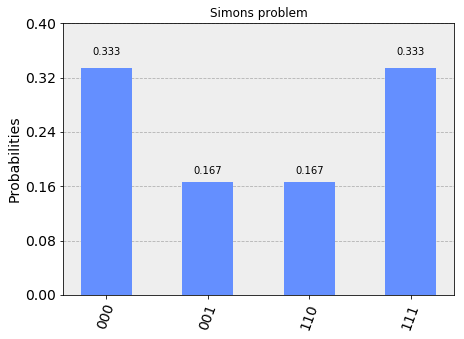

In [98]:
simulator = Aer.get_backend('qasm_simulator')

result = execute(circ, simulator, shots=n*2).result()
count = result.get_counts(circ)
plot_histogram(count, title='Simons problem')

In [96]:
count

{'111': 1, '110': 2, '001': 2, '000': 1}

In [8]:
secret = ""
for i in range(0, n):
    secret += str(random.randint(0, 10000)%2) #binary string

print(secret)

01


In [14]:
regs = 2

q = QuantumRegister(regs*2) # qubit register
c = ClassicalRegister(regs) # classical register
circ = QuantumCircuit(q, c) # Quantum Circuit on q
secret = None
number = None

    
def gen_rand():
    number = 0
    secret = [None] * regs
    j = regs-1
    for i in range(0, regs):
        rand = random.randint(0, 9)%2
        number += rand*(2**i)
        print("rand is %d" %rand)
        secret[j] = str(rand) #binary string
        j -= 1
    #if number == 0:
    #    secret = []
    #    j = regs-1
    #    return gen_rand()

    return number, secret
    
#generating random secret


number, secret = gen_rand()
print("binary is: "+"{0:b}".format(number))
print("number is %d" %number)
for i in range(0, len(secret)):
    print(">> secret[%d] is %s" %(i,secret[i]))
#print("secret[0] is %c" %secret[0])
print(">> secret is: "+''.join(secret)+"\n")

for i in range(0, regs):
    circ.h(q[i])
    #print("Hadamard on q[%d]" % i)

#begining of blackbox
circ.barrier()
for i in range(0, regs):
    circ.cx(q[i], q[i+regs])
    #copying first half of registers to second half
circ.barrier()
length = len(secret)
    
for i in range(0, length):
    if secret[i] == '1':
        circ.x(q[i+regs])
        circ.cx(q[i], q[i+regs])


    
# for i in range(0, regs):
    #if i % 2 == 0:
     #   circ.x(q[i])
    #else:
     #   circ.cx(q[i-1], q[i])
#    0
circ.barrier()
print(circ)

rand is 1
rand is 0
binary is: 1
number is 1
>> secret[0] is 0
>> secret[1] is 1
>> secret is: 01

              ┌───┐ ░            ░            ░ 
q7_0: |0>─────┤ H ├─░────────■───░────────────░─
         ┌───┐└───┘ ░        │   ░            ░ 
q7_1: |0>┤ H ├──────░───■────┼───░────────■───░─
         └───┘      ░   │  ┌─┴─┐ ░        │   ░ 
q7_2: |0>───────────░───┼──┤ X ├─░────────┼───░─
                    ░ ┌─┴─┐└───┘ ░ ┌───┐┌─┴─┐ ░ 
q7_3: |0>───────────░─┤ X ├──────░─┤ X ├┤ X ├─░─
                    ░ └───┘      ░ └───┘└───┘ ░ 
 c7_0: 0 ═══════════════════════════════════════
                                                
 c7_1: 0 ═══════════════════════════════════════
                                                
